#### The US Census Bureau conducts the ACS (American Community Survey) yearly. The following analyzes data on household computer use from the years 2013 to 2018:

#### 美国人口普查局每年进行 ACS（美国社区调查），分析2013-2018年家庭使用电脑数据如下：

https://data.census.gov/cedsci/table?t=Computer%20and%20Internet%20Use&g=0100000US%240400000&tid=ACSDT1Y2015.B28001&hidePreview=true&tp=true&moe=true

In [28]:
import os
import pandas as pd
import numpy as np
path='csv_files'
dir_list=sorted(os.listdir(path))
year=[int(x[7:11]) for x in dir_list]
dir_path=[path+'/'+x for x in dir_list]

##### 将文件编写成字典

In [128]:
content=[]
for x in dir_path:
    pd_reader=pd.read_csv(x)
    pd_content=pd_reader
    content.append(pd_content)
years=dict()
for i in range(len(year)):
    years[int(year[i])] = content[i]

##### 用名称查找具体值:loc, at(name); iat(number)

In [158]:
#years[2018].columns=years[2018][1:2].values.tolist()
columns=list(np.array(years[2018])[0:1])
years[2018].columns=columns
df_2018=years[2018][1:]
area=years[2018][list(columns[0])[1]].values.tolist()
df_2018.loc[area.index(["Wisconsin"]),["Estimate!!Total"]]
#df_2018.set_index(list(columns[0])[1])[1:2]

Estimate!!Total    2371960
Name: 50, dtype: object

##### for Wisconsin and adjacent states, what percent of households are estimated to be without a computer? (2018)
##### 对威斯康星和周边州来说，无电脑家庭的百分比？

{'Illinois': 8.524143737625552, 'Indiana': 9.463486214247707, 'Iowa': 9.468929459023103, 'Michigan': 8.936374942955922, 'Minnesota': 7.491847623005652, 'Wisconsin': 9.582497175331794}


Text(0, 0.5, '% of households w/o Computers')

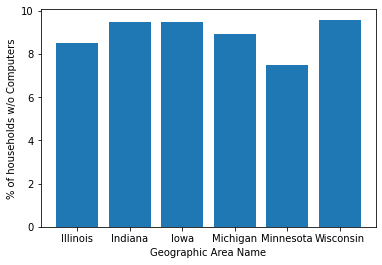

In [168]:
import matplotlib.pyplot as plt
total_no_computer=years[2018]['Estimate!!Total!!No Computer'].values.tolist()
estimate_total=years[2018]['Estimate!!Total'].values.tolist()
states=['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
state_index=[area.index([x]) for x in states]
fraction_num=[int(total_no_computer[n][0])/int(estimate_total[n][0])*100 for n in state_index]
no_computer=dict()
for i in range(len(states)):
    no_computer[states[i]]=fraction_num[i]
print(no_computer)
plt.bar(states, fraction_num)
plt.xlabel(list(columns[0])[1])
plt.ylabel('% of households w/o Computers')

Text(0, 0.5, 'WI Household without Computers (thousands)')

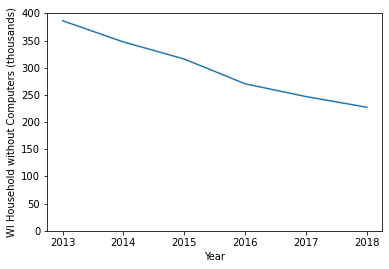

In [181]:
def wi_no_computer(year_number):
    columns=list(np.array(years[year_number])[0:1])
    years[year_number].columns=columns
    total_without_computer=years[year_number]['Estimate!!Total!!No Computer'].values.tolist()
    wi_without_computer=total_without_computer[area.index(["Wisconsin"])][0]
    return int(wi_without_computer)
wi_no=dict()
for i in year:
    wi_no[int(i)]=wi_no_computer(int(i))/1000
plt.plot(wi_no.keys(),wi_no.values())
plt.ylim(ymin=0,ymax=400)
plt.xlabel("Year")
plt.ylabel("WI Household without Computers (thousands)")